In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import KFold
from sklearn import metrics


In [2]:
#消除success的背景區域圖
HOG_data = pd.read_csv('database_HOG.csv')
Feature_data = pd.read_csv('database8F_3_0.csv')


In [3]:
HOG_data = HOG_data.drop('Unnamed: 0',axis = 1)   #消除第0行
Feature_data = Feature_data.drop('Unnamed: 0',axis = 1)   #消除第0行

In [4]:
Feature_data


,HG_mostNum,HG_std,HG_val,HG_entropy,GLCM_asm,GLCM_contrast,GLCM_entropt,GLCM_idm,label
0,7,4.218388,0.658659,3.568960,0.833648,0.000000,0.083061,0.913043,0
1,7,4.039544,0.664035,3.490376,0.833648,0.000000,0.083061,0.913043,0
2,24,12.329679,0.734958,5.047266,0.833648,0.000000,0.083061,0.913043,0
3,10,10.854882,0.676083,4.867942,0.833648,0.000000,0.083061,0.913043,0
4,11,8.830020,0.640324,4.548501,0.833648,0.000000,0.083061,0.913043,0
5,10,10.374794,0.669042,4.671535,0.833648,0.000000,0.083061,0.913043,0
6,11,18.659241,0.725560,5.227786,0.833648,0.000000,0.083061,0.913043,0
7,7,4.420097,0.720220,3.611113,0.833648,0.000000,0.083061,0.913043,0
8,6,5.418079,0.758399,3.899330,0.833648,0.000000,0.083061,0.913043,0
9,6,4.433054,0.732694,3.631464,0.833648,0.000000,0.083061,0.913043,0


In [5]:
#display(csv_data.describe())      #使用describe()函數查看每一列的描述性統計量

### 先訓練八個特徵資料的database

In [6]:
from sklearn.model_selection import train_test_split

Features = Feature_data.drop('label',axis=1)             
Label = Feature_data['label']
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.1, random_state=0) #分割1成測試就好
#將序列重排
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


In [7]:
#適用for迴圈
import sklearn.preprocessing 
#不做normalization  其經由實驗證明無法增加準確度再加上對驗證以及新資料不好做正規劃
def train_preprocess(X):
    # imputation
    pass
    
    return X

#for testing data
def test_preprocess(X):
     # imputation
    pass
    
    return X

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import Imputer

k_fold = StratifiedKFold(n_splits=5,shuffle = True, random_state=42)  #分层抽样（stratified sampling）来生成数据
model = SVC(C = 300 ,kernel = 'rbf' ,random_state=42 ,decision_function_shape = 'ovo',gamma = 0.01)
pipeline = make_pipeline(Imputer(), model)

accuracies = []
confmats = []
Features = X_train                  
Label = y_train
cup = 0 
for train_index, test_index in k_fold.split(Features,Label):
   #training
    X = Features.loc[train_index]
    y = Label.loc[train_index]         
    X_preprocess = train_preprocess(X)
    trained = pipeline.fit(X_preprocess, y)
    
    #testing(validation)
    X = Features.loc[test_index]
    y = Label.loc[test_index]         
    X_preprocess = test_preprocess(X)
    accuracy = trained.score(X_preprocess, y)
    accuracies.append(accuracy)
    y_pred = model.predict(X_preprocess)
    confmats.append(metrics.confusion_matrix(y, y_pred))
    
    #將最高的模型紀錄起來留給test data
    if accuracy >= cup :
        svm_model = model
        cup = accuracy
    
accuracies  #五個模型的準確度

C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.9409989437151048,
 0.9479323875641412,
 0.952,
 0.9489734299516909,
 0.9442934782608695]

In [9]:
#testing
from sklearn.metrics import accuracy_score
X = X_test
y = y_test       
X_preprocess = test_preprocess(X)
y_pred = svm_model.predict(X_preprocess) 
accuracy = accuracy_score(y, y_pred)  # 準確度 =  分類成功的樣本數 / 總樣本數
#accuracy = svm_model.score(X_preprocess, y)  #不用scikit learn的模型分數來做  ，結果同上哈哈哈
print("accuracy : {:f}".format(accuracy))

accuracy : 0.944580


In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

Features = Feature_data.drop('label',axis=1)             
Label = Feature_data['label']
Label = label_binarize(Label, classes=[0, 1, 2]) #將標籤二值化
n_classes = Label.shape[1]    #設置種類

X_train, X_test, y_train, y_test = train_test_split(Features.values, Label, test_size=0.1, random_state=0) #分割1成測試就好

n_samples, n_features = X.shape

# Learn to predict each class against the other
classifier = OneVsRestClassifier(SVC(C = 300 ,kernel = 'rbf' ,random_state=42 ,decision_function_shape = 'ovr',gamma = 0.01))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [11]:
# 计算每一类的ROC
from sklearn.metrics import roc_curve, auc
from scipy import interp
fpr_8f = dict()
tpr_8f = dict()
roc_auc_8f = dict()

for i in range(n_classes):
    fpr_8f[i], tpr_8f[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc_8f[i] = auc(fpr_8f[i], tpr_8f[i])
    
# Compute micro-average ROC curve and ROC area
fpr_8f["micro"], tpr_8f["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc_8f["micro"] = auc(fpr_8f["micro"], tpr_8f["micro"])


# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr_8f[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr_8f[i], tpr_8f[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr_8f["macro"] = all_fpr
tpr_8f["macro"] = mean_tpr
roc_auc_8f["macro"] = auc(fpr_8f["macro"], tpr_8f["macro"])

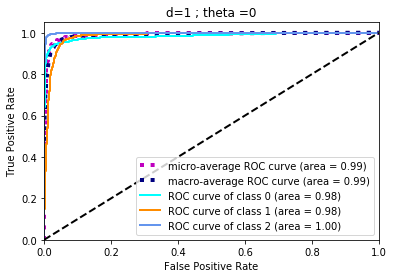

In [12]:
import matplotlib.pyplot as plt
from itertools import cycle
lw = 2 #線的粗細
plt.figure()
plt.plot(fpr_8f["micro"], tpr_8f["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_8f["micro"]),
         color='m', linestyle=':', linewidth=4)

plt.plot(fpr_8f["macro"], tpr_8f["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_8f["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_8f[i], tpr_8f[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc_8f[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('d=1 ; theta =0')
plt.legend(loc="lower right")
plt.show()

### 在訓練hog

In [13]:
Features = HOG_data.drop('label',axis=1)             
Label = HOG_data['label']
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.1, random_state=0) #分割数据集
#將序列重排
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)


In [14]:
k_fold = StratifiedKFold(n_splits=5,shuffle = True, random_state=42)
model = SVC(C = 30 ,kernel = 'rbf' ,random_state=42 ,decision_function_shape = 'ovo',gamma = 2)
pipeline = make_pipeline(Imputer(), model)
Features = X_train                  
Label = y_train
accuracies = []
confmats = []
Features = X_train                  
Label = y_train
cup = 0 

C:\Users\USER\Anaconda3\envs\paper\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
for train_index, test_index in k_fold.split(Features,Label):
    #training
    X = Features.loc[train_index]
    y = Label.loc[train_index]         
    trained = pipeline.fit(X, y)
    
    #testing(validation)
    X = Features.loc[test_index]
    y = Label.loc[test_index]         
    accuracy = trained.score(X, y)
    accuracies.append(accuracy)
    y_pred = model.predict(X)
    confmats.append(metrics.confusion_matrix(y, y_pred))
    
    #將最高的模型紀錄起來留給test data
    if accuracy >= cup :
        svm_model = model
        cup = accuracy
accuracies  #五個模型的準確度
    

[0.9287762185000754,
 0.9337458496830667,
 0.9246792452830188,
 0.9313103864734299,
 0.9260265700483091]

In [16]:
#testing
from sklearn.metrics import accuracy_score
X = X_test
y = y_test       
X_preprocess = test_preprocess(X)
y_pred = svm_model.predict(X_preprocess) 
accuracy = accuracy_score(y, y_pred)  # 準確度 =  分類成功的樣本數 / 總樣本數
#accuracy = svm_model.score(X_preprocess, y)  #不用scikit learn的模型分數來做  ，結果同上哈哈哈
print("accuracy : {:f}".format(accuracy))

accuracy : 0.928280


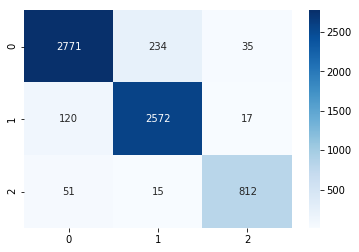

In [17]:
sns.heatmap(confmats[0], cmap="Blues", annot=True, fmt="d")

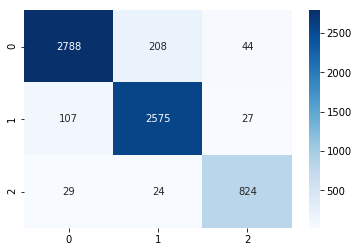

In [18]:
sns.heatmap(confmats[1], cmap="Blues", annot=True, fmt="d")

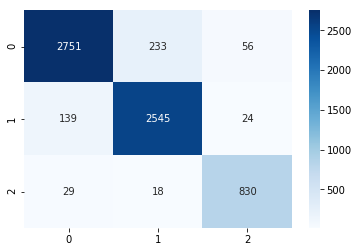

In [19]:
sns.heatmap(confmats[2], cmap="Blues", annot=True, fmt="d")

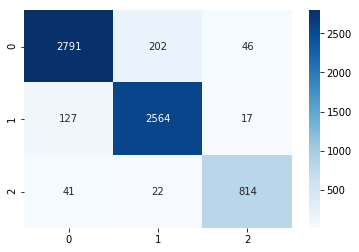

In [20]:
sns.heatmap(confmats[3], cmap="Blues", annot=True, fmt="d")

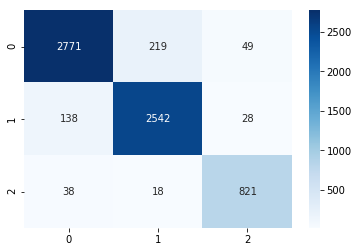

In [21]:
sns.heatmap(confmats[4], cmap="Blues", annot=True, fmt="d")

In [22]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

Features = HOG_data.drop('label',axis=1)             
Label = HOG_data['label']
Label = label_binarize(Label, classes=[0, 1, 2]) #將標籤二值化
n_classes = Label.shape[1]    #設置種類

X_train, X_test, y_train, y_test = train_test_split(Features.values, Label, test_size=0.1, random_state=0) #分割1成測試就好

n_samples, n_features = X.shape

# Learn to predict each class against the other
classifier = OneVsRestClassifier(SVC(C = 30 ,kernel = 'rbf' ,random_state=42 ,decision_function_shape = 'ovr',gamma = 2))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [23]:

fpr_HOG = dict()
tpr_HOG = dict()
roc_auc_HOG = dict()

for i in range(n_classes):
    fpr_HOG[i], tpr_HOG[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc_HOG[i] = auc(fpr_HOG[i], tpr_HOG[i])
    
# Compute micro-average ROC curve and ROC area
fpr_HOG["micro"], tpr_HOG["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc_HOG["micro"] = auc(fpr_HOG["micro"], tpr_HOG["micro"])


# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr_HOG[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr_HOG[i], tpr_HOG[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr_HOG["macro"] = all_fpr
tpr_HOG["macro"] = mean_tpr
roc_auc_HOG["macro"] = auc(fpr_HOG["macro"], tpr_HOG["macro"])

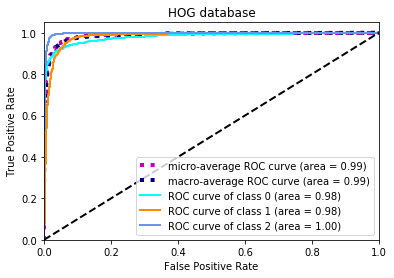

In [24]:
import matplotlib.pyplot as plt
from itertools import cycle
lw = 2 #線的粗細
plt.figure()
plt.plot(fpr_HOG["micro"], tpr_HOG["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_HOG["micro"]),
         color='m', linestyle=':', linewidth=4)

plt.plot(fpr_HOG["macro"], tpr_HOG["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc_HOG["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_HOG[i], tpr_HOG[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc_HOG[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('HOG database')
plt.legend(loc="lower right")
plt.show()

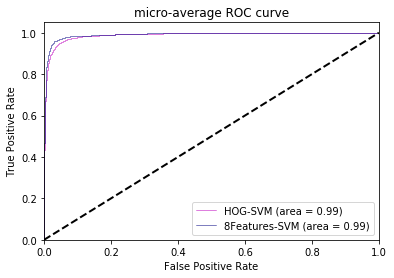

In [25]:
import matplotlib.pyplot as plt
# micro-average ROC curve
lw = 2 #線的粗細
plt.figure()
plt.plot(fpr_HOG["micro"], tpr_HOG["micro"],
         label='HOG-SVM (area = {0:0.2f})'
               ''.format(roc_auc_HOG["micro"]),
         color='m', linestyle='-', linewidth=0.5)

plt.plot(fpr_8f["micro"], tpr_8f["micro"],
         label='8Features-SVM (area = {0:0.2f})'
               ''.format(roc_auc_HOG["micro"]),
         color='navy', linestyle='-', linewidth=0.5)


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('micro-average ROC curve')
plt.legend(loc="lower right")
plt.show()

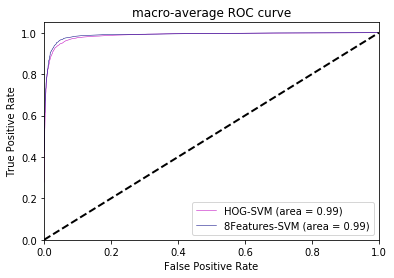

In [26]:
# macro-average ROC curve
lw = 2 #線的粗細
plt.figure()
plt.plot(fpr_HOG["macro"], tpr_HOG["macro"],
         label='HOG-SVM (area = {0:0.2f})'
               ''.format(roc_auc_HOG["micro"]),
         color='m', linestyle='-', linewidth=0.5)

plt.plot(fpr_8f["macro"], tpr_8f["macro"],
         label='8Features-SVM (area = {0:0.2f})'
               ''.format(roc_auc_HOG["micro"]),
         color='navy', linestyle='-', linewidth=0.5)


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('macro-average ROC curve')
plt.legend(loc="lower right")
plt.show()